**Exercise 1**


1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [1]:
# Import necessary libraries and display the few rows of data in Dataframe
import pandas as pd
df = pd.read_csv("/content/train.tsv", sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


2. Take a look at the data and get info about the data

In [2]:
# Display the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [3]:
# Display the shape of dataframe
df.shape

(156060, 4)

In [4]:
# Display the statistical data of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhraseId,156060.0,78030.500000,45050.785842,1.0,39015.75,78030.5,117045.25,156060.0
SentenceId,156060.0,4079.732744,2502.764394,1.0,1861.75,4017.0,6244.00,8544.0
Sentiment,156060.0,2.063578,0.893832,0.0,2.00,2.0,3.00,4.0


In [5]:
# Display number of Null values in each column
df.isnull().sum()

,0
PhraseId,0
SentenceId,0
Phrase,0
Sentiment,0


3. Count the number of expressed sentiments by category

In [6]:
# Displays the unique labels for the column 'Sentiment'
df['Sentiment'].unique()

array([1, 2, 3, 4, 0])

In [7]:
# Provides value counts for all the unique labels in 'Sentiment' column
df['Sentiment'].value_counts()

,count
Sentiment,
2,79582
3,32927
1,27273
4,9206
0,7072


4. Provide a histogram of sentiments by category

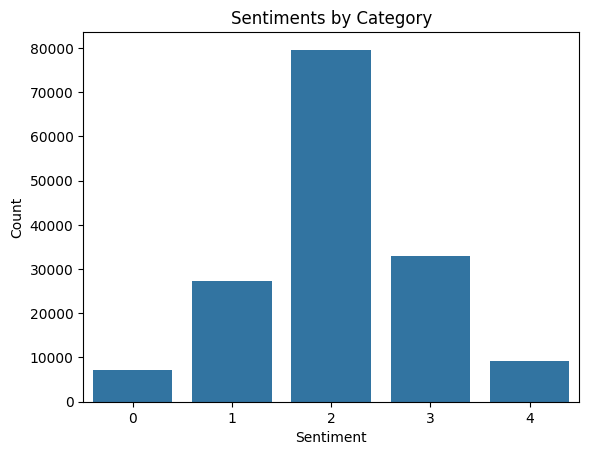

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the histogram using Seaborn
sns.countplot(data=df, x='Sentiment')

# Labeling and displaying the plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiments by Category')
plt.show()

5. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers

In [9]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Ensure the text data is in string format
text_data = df['Phrase'].astype(str)

# Initialize CountVectorizer with a token pattern to capture word tokens
# Punctuation marks & Numbers are ignored in the word token with this regular expression r'\b\w+\b'
# Fit the vectorizer and transform the text data to document-term matrix
vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')
document_term = vectorizer.fit_transform(text_data)

# Convert the document term matrix to a DataFrame
# Getting the feature names (words) to use as column names
# Display the first 5 rows of the DataFrame
document_term_matrix_df = pd.DataFrame(document_term.toarray(), columns = vectorizer.get_feature_names_out())
document_term_matrix_df.head()

,a,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6. Split dataset (the test dataset represents 30% of the total data).

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define X and y
X = df['Phrase'].astype(str)
y = df['Sentiment']

# 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
print("X_train shape :", X_train.shape)
print(X_train.head(), '\n')
print("X_test shape :",X_test.shape)
print(X_test.head(), '\n')
print("y_train shape :",y_train.shape)
print(y_train.head(), '\n')
print("y_test shape :",y_test.shape)
print(y_test.head(), '\n')

X_train shape : (109242,)
50984    A chilling tale of one of the great crimes of ...
92857    is a strength of a documentary to disregard av...
61263                                         Palestinians
10662                                         $ 50-million
6402                                              computer
Name: Phrase, dtype: object 

X_test shape : (46818,)
100967    the implication is Kissinger may have decided ...
61789                         modest , crowd-pleasing goals
106060                      is like binging on cotton candy
63994     For Martin is made infinitely more wrenching b...
38827                 Two hours of sepia-tinted heavy metal
Name: Phrase, dtype: object 

y_train shape : (109242,)
50984    3
92857    3
61263    2
10662    2
6402     2
Name: Sentiment, dtype: int64 

y_test shape : (46818,)
100967    2
61789     4
106060    3
63994     4
38827     2
Name: Sentiment, dtype: int64 



7. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.

In [11]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Converting text data to numerical features using CountVectorizer()
vectorizer = CountVectorizer()
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

# Multinomial Naive Bayes classifier
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_vectorizer, y_train)

# Predict on the test data
y_pred = multinomial_nb.predict(X_test_vectorizer)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Model Accuracy using count vectorizer: {accuracy:.2f}\n")

# Classification report for detailed performance metrics
print("Classification Report using count vectorizer:")
print(classification_report(y_test, y_pred))


Multinomial Naive Bayes Model Accuracy using count vectorizer: 0.61

Classification Report using count vectorizer:
              precision    recall  f1-score   support

           0       0.42      0.27      0.33      2067
           1       0.49      0.45      0.47      8135
           2       0.69      0.77      0.73     23910
           3       0.52      0.50      0.51      9861
           4       0.48      0.31      0.38      2845

    accuracy                           0.61     46818
   macro avg       0.52      0.46      0.48     46818
weighted avg       0.60      0.61      0.60     46818



8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.
9. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.
10. Build the Text Classification Model using TF-IDF.
11. First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.
12. Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [12]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# # Converting text data to numerical features using TfidfVectorizer()
tfidf= TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Multinomial Naive Bayes classifier
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = multinomial_nb.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Model Accuracy using Tfidf vectorizer: {accuracy:.2f}\n")

# Optional: Show the classification report for more detailed metrics
print("Classification Report using Tfidf vectorizer:")
print(classification_report(y_test, y_pred))

Multinomial Naive Bayes Model Accuracy using Tfidf vectorizer: 0.59

Classification Report using Tfidf vectorizer:
              precision    recall  f1-score   support

           0       0.65      0.03      0.05      2067
           1       0.51      0.25      0.33      8135
           2       0.60      0.90      0.72     23910
           3       0.53      0.38      0.45      9861
           4       0.64      0.05      0.09      2845

    accuracy                           0.59     46818
   macro avg       0.59      0.32      0.33     46818
weighted avg       0.58      0.59      0.53     46818

